In [1]:
import matplotlib.pyplot as plt
import pyvista as pv
from pyvista import examples
from pyvista.core.pointset import PolyData
from pyvista.utilities.reader import STLReader
from typing import List, Tuple
import numpy as np
from PIL import Image
import cv2
import math
import copy

In [2]:
%matplotlib inline

In [3]:
def rotateObj(reader: STLReader, rotList: Tuple[int, int, int], camScale: int):
    p = pv.Plotter(off_screen=True)
    obj = reader.read()

    rot = obj.rotate_x(rotList[0], point=obj.center, inplace=True)
    rot = obj.rotate_y(rotList[1], point=obj.center, inplace=True)
    rot = obj.rotate_z(rotList[2], point=obj.center, inplace=True)

    
    normal = (1, 0, 0)
    projected = rot.project_points_to_plane(origin=rot.center, normal=normal)
    
    p.add_mesh(projected, show_scalar_bar=False)
    
    p.camera_position = 'yz'
    p.camera.SetParallelProjection(True)
    p.window_size = (max(p.window_size), max(p.window_size))
    p.camera.parallel_scale = camScale
    
    return(p.screenshot())

In [4]:
def rotate_get_scale(reader: STLReader, rotList: Tuple[int, int, int]):
    p = pv.Plotter(off_screen=True)
    obj = reader.read()

    rot = obj.rotate_x(rotList[0], point=obj.center, inplace=True)
    rot = obj.rotate_y(rotList[1], point=obj.center, inplace=True)
    rot = obj.rotate_z(rotList[2], point=obj.center, inplace=True)
    
    normal = (1, 0, 0)
    projected = rot.project_points_to_plane(origin=rot.center, normal=normal)
    
    p.add_mesh(projected, show_scalar_bar=False)
    
    p.camera_position = 'yz'
    p.camera.SetParallelProjection(True)
    p.window_size = (max(p.window_size), max(p.window_size))
    camScale = p.camera.parallel_scale
    
    return(camScale)

In [5]:
def getWhiteVals(imarray):
    percent_vals = []
    
    for idx, x in enumerate(imarray):
        x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)

        ret, binary = cv2.threshold(x,76,255,cv2.THRESH_BINARY)
        pixel_count = x.shape[0] * x.shape[1]
        white_count = np.sum(binary == 255)

#         percent_vals.append(white_count)
        percent_vals.append(round(100*white_count / pixel_count, 2))
    
    return(percent_vals)

In [6]:
def maxmin_tuple(x, y):
    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]
    
    ymin = min(y)
    _xpos = y.index(ymin)
    xmin = x[_xpos]
    
    return([xmax, ymax], [xmin, ymin])

In [7]:
def itr_rotate(y_min: int, y_max: int, y_step: int, z_min: int, z_max: int, z_step: int, path: str, camScale: int = 0.25):
    synapse_name = (path.split("/")[-1]).split(".")[0]
    syn_reader = pv.get_reader(path)

    circ_Imgs = []
    maxSurfaceArea = [0, 0, 0] #X, Y, Value

    for i in range(y_min, y_max, y_step):
        itr_arr = []

        for j in range(z_min, z_max, z_step):
            screenshot = rotateObj(syn_reader, (0, i, j), camScale)        
            itr_arr.append(screenshot)

            ss_w = getWhiteVals([screenshot])
            if(ss_w[0] > maxSurfaceArea[2]):
                maxSurfaceArea[0], maxSurfaceArea[1], maxSurfaceArea[2] = i, j, ss_w[0]

        circ_Imgs.append(itr_arr)
        circ_ar = cv2.hconcat(itr_arr)
        plt.imshow(circ_ar)
        plt.axis('off')
        plt.show()
    
    return(circ_Imgs, maxSurfaceArea)

In [8]:
def find_scale(y_min: int, y_max: int, y_step: int, z_min: int, z_max: int, z_step: int, path: str):
    synapse_name = (path.split("/")[-1]).split(".")[0]
    syn_reader = pv.get_reader(path)

    camScales = []

    for i in range(y_min, y_max, y_step):

        for j in range(z_min, z_max, z_step):
            camScale = rotate_get_scale(syn_reader, (0, i, j))        
            camScales.append(camScale)
    
    print(f"Max: {max(camScales)}")
    return(max(camScales))

Max: 0.00035830854107965656


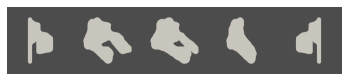

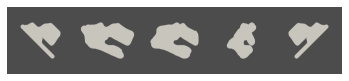

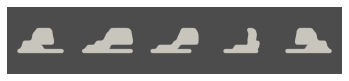

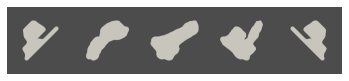

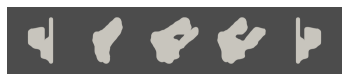

In [9]:
y_min, y_max, y_step = -90, 135, 45
z_min, z_max, z_step = -90, 135, 45

# synapse_path = "./paired synapse-vesicle meshes/1 - Synapse 408.stl"
# vesicle_path = "./paired synapse-vesicle meshes/1 - Vesicle 631.stl"

# synapse_path = "./paired synapse-vesicle meshes/2 - Synapse 492.stl"
# vesicle_path = "./paired synapse-vesicle meshes/2 - Vesicle 698.stl"

# synapse_path = "./paired synapse-vesicle meshes/3 - Synapse 3.stl"
# vesicle_path = "./paired synapse-vesicle meshes/3 - Vesicle 284.stl"

# synapse_path = "./paired synapse-vesicle meshes/4 - Synapse 346.stl"
# vesicle_path = "./paired synapse-vesicle meshes/4 - Vesicle 275.stl"

# synapse_path = "./paired synapse-vesicle meshes/5 - Synapse 473.stl"
# vesicle_path = "./paired synapse-vesicle meshes/5 - Vesicle 480.stl"

synapse_path = "./paired synapse-vesicle meshes/6 - Synapse 471.stl"
vesicle_path = "./paired synapse-vesicle meshes/6 - Vesicle 290.stl"

# synapse_path = "./paired synapse-vesicle meshes/7 - Synapse 206.stl"
# vesicle_path = "./paired synapse-vesicle meshes/7 - Vesicle 604.stl"

# synapse_path = "./paired synapse-vesicle meshes/8 - Synapse 552.stl"
# vesicle_path = "./paired synapse-vesicle meshes/8 - Vesicle 752.stl"

# synapse_path = "./paired synapse-vesicle meshes/9 - Synapse 167.stl"
# vesicle_path = "./paired synapse-vesicle meshes/9 - Vesicle 182.stl"

# synapse_path = "./paired synapse-vesicle meshes/10 - Synapse 96.stl"
# vesicle_path = "./paired synapse-vesicle meshes/10 - Vesicle 66.stl"

camScale = find_scale(y_min, y_max, y_step, z_min, z_max, z_step, synapse_path)
image_array, minMaxVal = itr_rotate(y_min, y_max, y_step, z_min, z_max, z_step, synapse_path, camScale)

In [10]:
print(minMaxVal)

[-90, 0, 27.34]


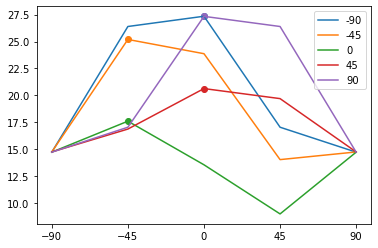

In [11]:
degree_nums = range(-90, 135, 45)

for idx, x in enumerate(image_array):
    whites = getWhiteVals(x)
    plt.plot(degree_nums, whites, label=str(range(-90, 135, 45)[idx]))
    _max, _min = maxmin_tuple(degree_nums, whites)
    plt.scatter(_max[0], _max[1])

plt.legend(loc="upper right")
plt.xticks(np.arange(-90, 135, 45))

plt.show()

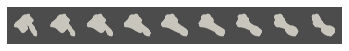

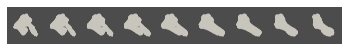

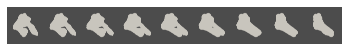

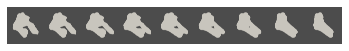

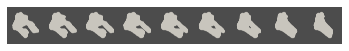

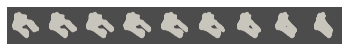

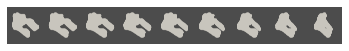

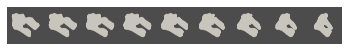

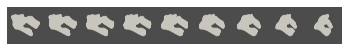

In [12]:
y_deg = minMaxVal[0]
z_deg = minMaxVal[1]

y_min, y_max = y_deg - 45, y_deg + 45
z_min, z_max = z_deg - 45, z_deg + 45

y_step = 10
z_step = 10

hq_image_array, hq_minMaxVal = itr_rotate(y_min, y_max, y_step, z_min, z_max, z_step, synapse_path, camScale)

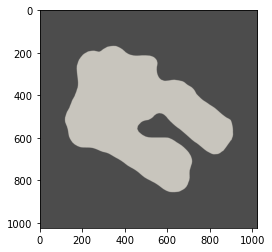

In [13]:
plt.imshow(hq_image_array[6][2])
plt.show()

In [14]:
print(hq_minMaxVal)

[-75, -25, 28.68]


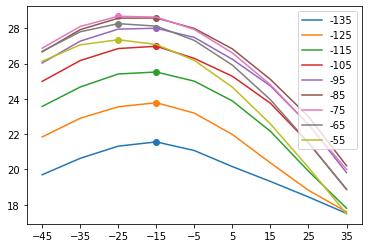

In [15]:
degree_nums = range(z_deg - 45, z_deg + 45, 10)

for idx, x in enumerate(hq_image_array):
    whites = getWhiteVals(x)
    plt.plot(degree_nums, whites, label=str(range(y_min, y_max, y_step)[idx]))
    _max, _min = maxmin_tuple(degree_nums, whites)
    plt.scatter(_max[0], _max[1])

plt.legend(loc="upper right")
plt.xticks(np.arange(z_deg - 45, z_deg + 45, 10))

plt.show()

# Projection

In [16]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [17]:
def angle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang

In [18]:
def plotObj(polyObj: PolyData, focalPoint: Tuple[int, int, int], camScale: float):
    p = pv.Plotter(off_screen=True)
    
    _projected = polyObj.project_points_to_plane(origin=polyObj.center, normal=normal)
    
    p.add_mesh(_projected)
    
    p.camera_position = 'yz'
    p.camera.SetParallelProjection(True)
    p.camera.focal_point = focalPoint
    p.camera.parallel_scale = camScale
        
    p.show()
    
    return(p.screenshot())

In [19]:
def bm1(mask1, mask2):
    mask1_area = np.count_nonzero( mask1 )
    mask2_area = np.count_nonzero( mask2 )
    intersection = np.count_nonzero( np.logical_and( mask1, mask2 ) )
    iou = intersection/(mask1_area+mask2_area-intersection)
    return iou

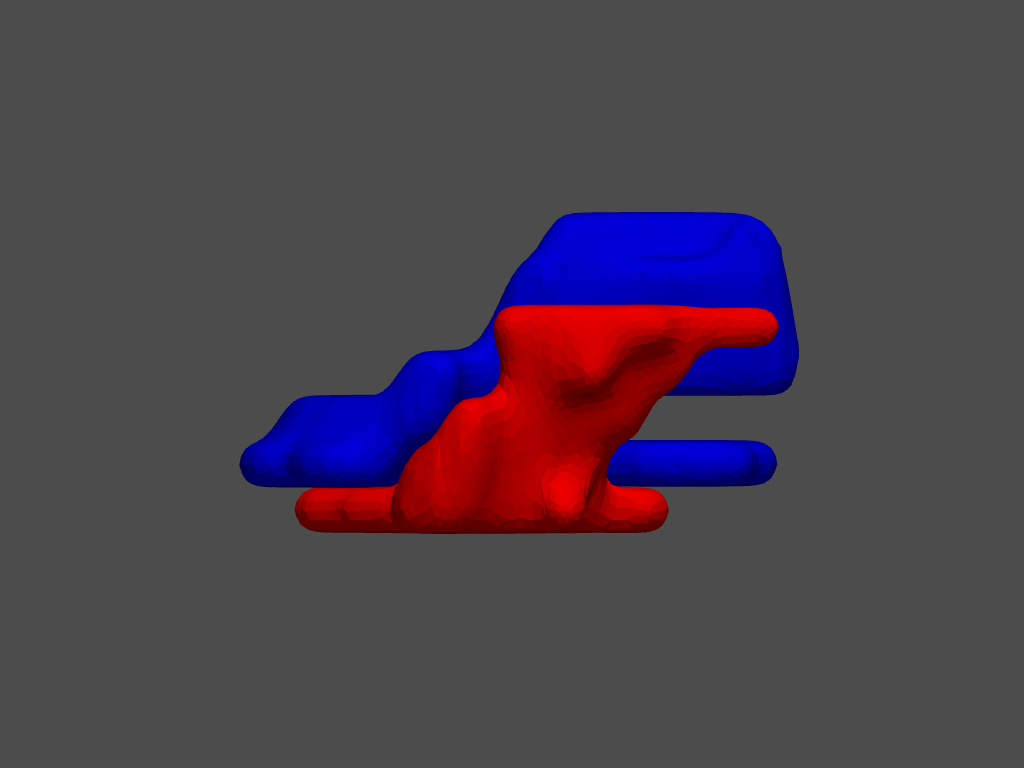

In [25]:
# synapse_path = "./paired synapse-vesicle meshes/2 - Synapse 492.stl"
# vesicle_path = "./paired synapse-vesicle meshes/2 - Vesicle 698.stl"

sy_reader = pv.get_reader(synapse_path)
ves_reader = pv.get_reader(vesicle_path)

synapse = sy_reader.read()
vesicle = ves_reader.read()

p = pv.Plotter(off_screen=True)

# == SET INITIAL POSITIONS ==
p1 = (synapse.center)
X, Y, Z = p1
p2 = (vesicle.center)
_X, _Y, _Z = p2

synapseOrigin = (0 - X, 0 - Y, 0 - Z)
vesicleOrigin = (0 - _X, 0 - _Y, 0 - _Z)

# == ROTATE MESHES TO BE IN LINE ==

center = ((p2[0]+p1[0])/2, (p1[1]+p2[1])/2, (p1[2]+p2[2])/2)
circleRad = math.sqrt(pow((p1[0] - center[0]), 2) + pow((p1[1] - center[1]), 2))
p3 = (center[0] - circleRad, center[1])

angle1 = angle(p1, center, p3)

synapseRot = synapse.rotate_z(angle1, center, inplace=True)
vesicleRot = vesicle.rotate_z(angle1, center, inplace=True)


# synapseRot = copy.copy(synapse)
# vesicleRot = copy.copy(vesicle)

# synapseRot.rotate_y(hq_minMaxVal[0], synapse.center, inplace=True)
# synapseRot.rotate_z(hq_minMaxVal[1], synapse.center, inplace=True)

# vesicleRot.rotate_y(hq_minMaxVal[0], synapse.center, inplace=True)
# vesicleRot.rotate_z(hq_minMaxVal[1], synapse.center, inplace=True)

p.add_mesh(synapseRot, color="Blue")
p.add_mesh(vesicleRot, color="Red")
# p.add_mesh(synapse, color="Blue")
# p.add_mesh(vesicle, color="Red")

# == PROJECT TO PLANE ==

normal = (1, 0, 0)
sy_projected = synapseRot.project_points_to_plane(origin=center, normal=normal)
ves_projected = vesicleRot.project_points_to_plane(origin=center, normal=normal)

# p.add_mesh(sy_projected, color = 'Blue', show_scalar_bar=False)
# p.add_mesh(ves_projected, color = 'Red', show_scalar_bar=False)

# == CAMERA SETTINGS ==
p.camera_position = 'yz'
p.camera.SetParallelProjection(True)
p.camera.focal_point = center
camScale = p.camera.parallel_scale

p.show()

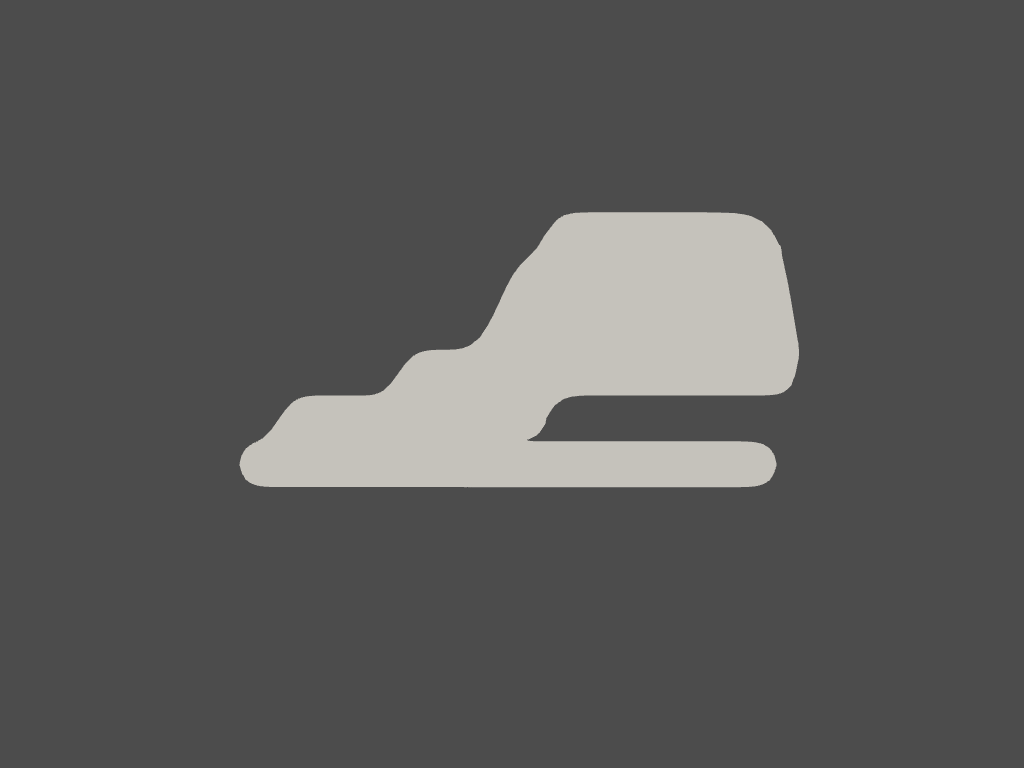

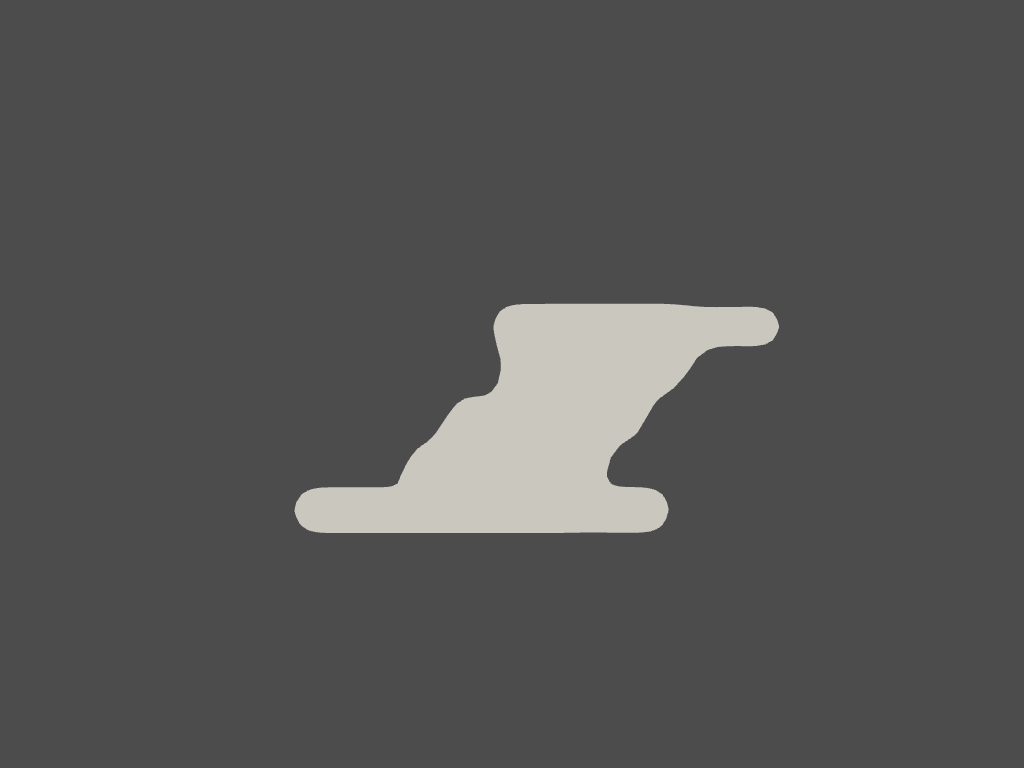

In [26]:
synPlot = pv.Plotter(off_screen=True)
vesPlot = pv.Plotter(off_screen=True)

synPlot.add_mesh(sy_projected, show_scalar_bar=False)
vesPlot.add_mesh(ves_projected, show_scalar_bar=False)

# == CAMERA SETTINGS ==
synPlot.camera_position = 'yz'
synPlot.camera.SetParallelProjection(True)
synPlot.camera.focal_point = center
synPlot.camera.parallel_scale = camScale
synImg = synPlot.screenshot()

vesPlot.camera_position = 'yz'
vesPlot.camera.SetParallelProjection(True)
vesPlot.camera.focal_point = center
vesPlot.camera.parallel_scale = camScale
vesImg = vesPlot.screenshot()

synPlot.show()
vesPlot.show()

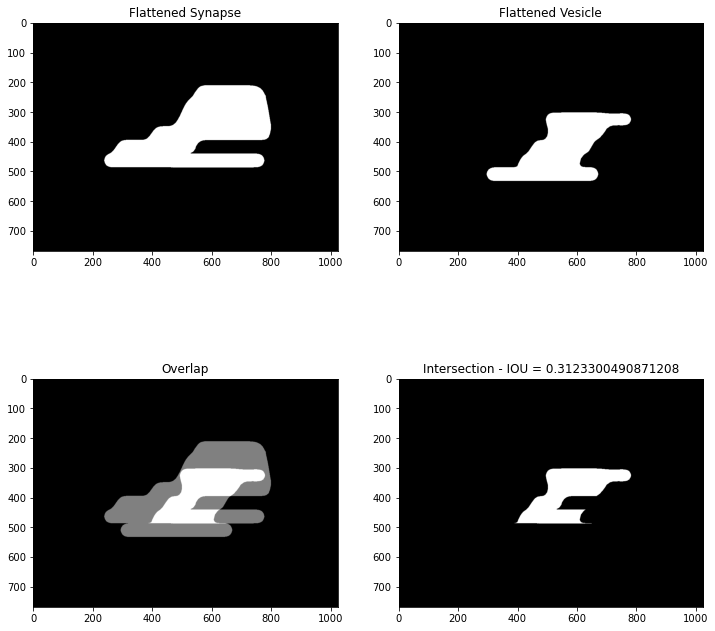

In [27]:
synapseOverlay = cv2.cvtColor(synImg, cv2.COLOR_BGR2GRAY)
vesicleOverlay = cv2.cvtColor(vesImg, cv2.COLOR_BGR2GRAY)

thresh=76
syn_bw = cv2.threshold(synapseOverlay, thresh, 255, cv2.THRESH_BINARY)[1]
ves_bw = cv2.threshold(vesicleOverlay, thresh, 255, cv2.THRESH_BINARY)[1]

mergedOverlay = cv2.addWeighted(syn_bw, 0.5, ves_bw, 0.5, 0)
intersection = cv2.threshold(mergedOverlay, 128, 255, cv2.THRESH_BINARY)[1]

IOU = bm1(syn_bw, ves_bw)

fig, ax = plt.subplots(
    nrows=2, ncols=2, figsize = (12,12)
)

ax[0, 0].imshow(syn_bw, 'gray')
ax[0, 0].title.set_text('Flattened Synapse')

ax[0, 1].imshow(ves_bw, 'gray')
ax[0, 1].title.set_text('Flattened Vesicle')

ax[1, 0].imshow(mergedOverlay, 'gray')
ax[1, 0].title.set_text('Overlap')

ax[1, 1].imshow(intersection, 'gray')
ax[1, 1].title.set_text('Intersection - IOU = {}'.format(IOU))

# plt.imshow(dst, 'gray')
# plt.show()

# print(type(syn_bw))